In [1]:
from bs4 import BeautifulSoup as bs
import requests as req
import matplotlib.pyplot as plt
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
res = req.get("https://www.nasdaq.com/quotes/stock-quotes.aspx")
soup = bs(res.content, "html.parser")

In [3]:
tableNode = soup.select('td')

namelist = []
volumelist = []
percentlist = []

# 1~5
# 1 : Name
# 3 : PctChange
# 4 : Volume
for i in range(1,21):
    if i%4 == 0:
        volumelist.append(int(str(tableNode[i]).replace('<td>', '').replace(' </td>', '').replace(',', '')))
        conamestr = re.sub(r'</div>\n</td>', '', re.sub(r'<td>(?s).*coName small">', '', str(tableNode[i-3])))
        conamestr = re.sub(r',(s?).*','',conamestr.replace('Inc.', '').replace('Group', '').replace('Ltd.', '').replace('Technology', ''))
        namelist.append(conamestr.strip())
        percentchange = str(tableNode[i-1])
        if "▼" in percentchange:
            percentchange = float('-' + re.sub(r'\D.\D(?s).*</span></td>', '', re.sub(r'<td><span class=".*">', '', str(tableNode[i-1]))))
        else:
            percentchange = float(re.sub(r'\D.\D(?s).*</span></td>', '', re.sub(r'<td><span class=".*">', '', str(tableNode[i-1]))))

        percentlist.append(percentchange)

print(namelist)
print(volumelist)
print(percentlist)

['Micron', 'Invesco QQQ Trust', 'Apple', 'Marvell', 'JD.com']
[45632121, 40453097, 35791794, 35454503, 24782813]
[0.21, -0.7, -1.8, -0.01, -0.3]


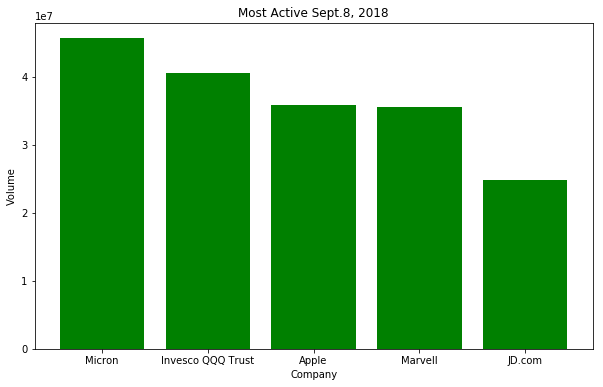

In [4]:
%matplotlib inline

x = namelist
yval = volumelist
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(10,6))
plt.bar(x_pos, yval, color='green')
plt.xticks(x_pos, x)
plt.xlabel("Company")
plt.ylabel("Volume")
plt.title("Most Active Sept.8, 2018")
plt.show()

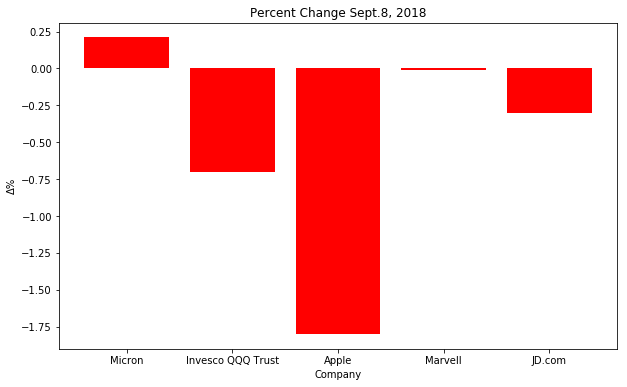

In [5]:
%matplotlib inline

x = namelist
yval = percentlist
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(10,6))
plt.bar(x_pos, yval, color='red')
plt.xticks(x_pos, x)
plt.xlabel("Company")
plt.ylabel("Δ%")
plt.title("Percent Change Sept.8, 2018")
plt.show()